# LGBM & XGBM

#### Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.

In [67]:
import pandas as pd

train_df = pd.read_csv('Titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

2.	Check for missing values

In [69]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3.	Explore data distributions using histograms and box plots.

In [70]:
numerical_col = train_df.select_dtypes(include='number').columns.to_list()
features = train_df.columns.to_list()
numerical_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

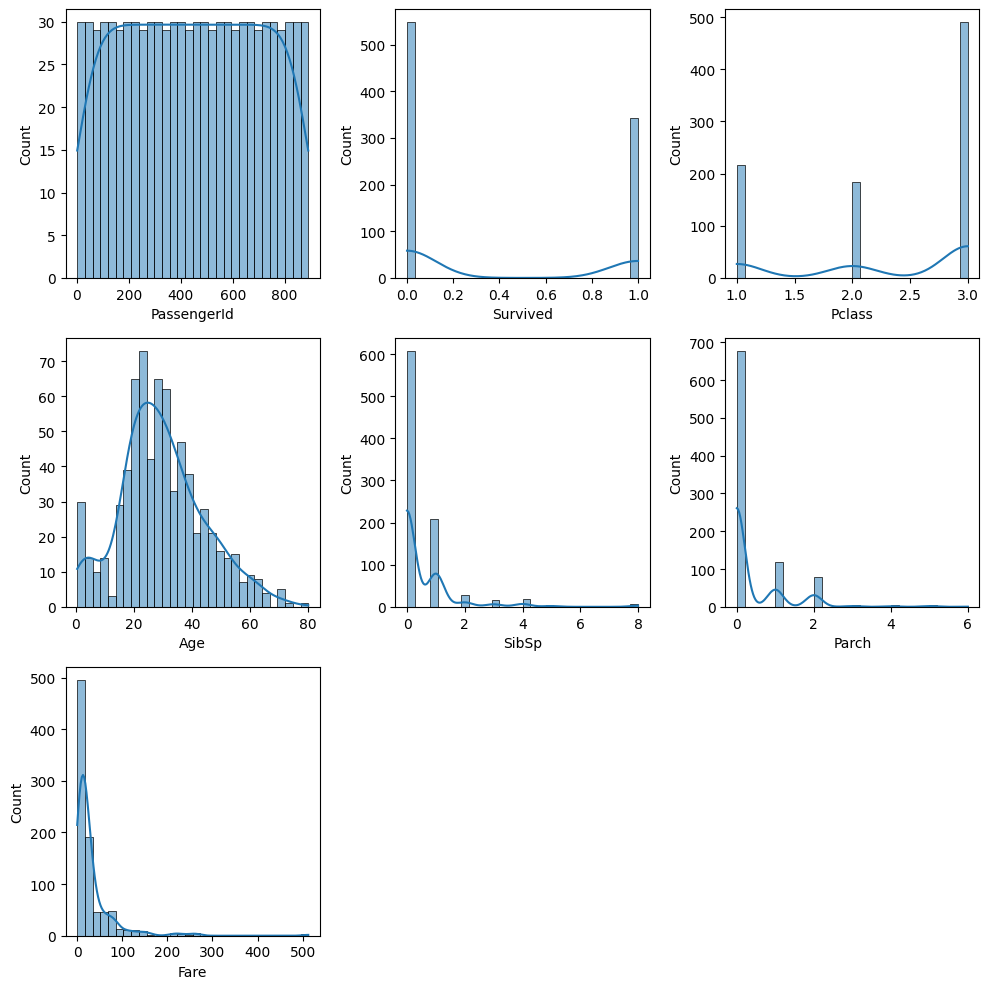

In [72]:
# Histograms
plt.figure(figsize=(10,10))

for i,col in enumerate(numerical_col):
    plt.subplot(3,3,i+1)
    sns.histplot(train_df[col],kde=True,bins=30)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

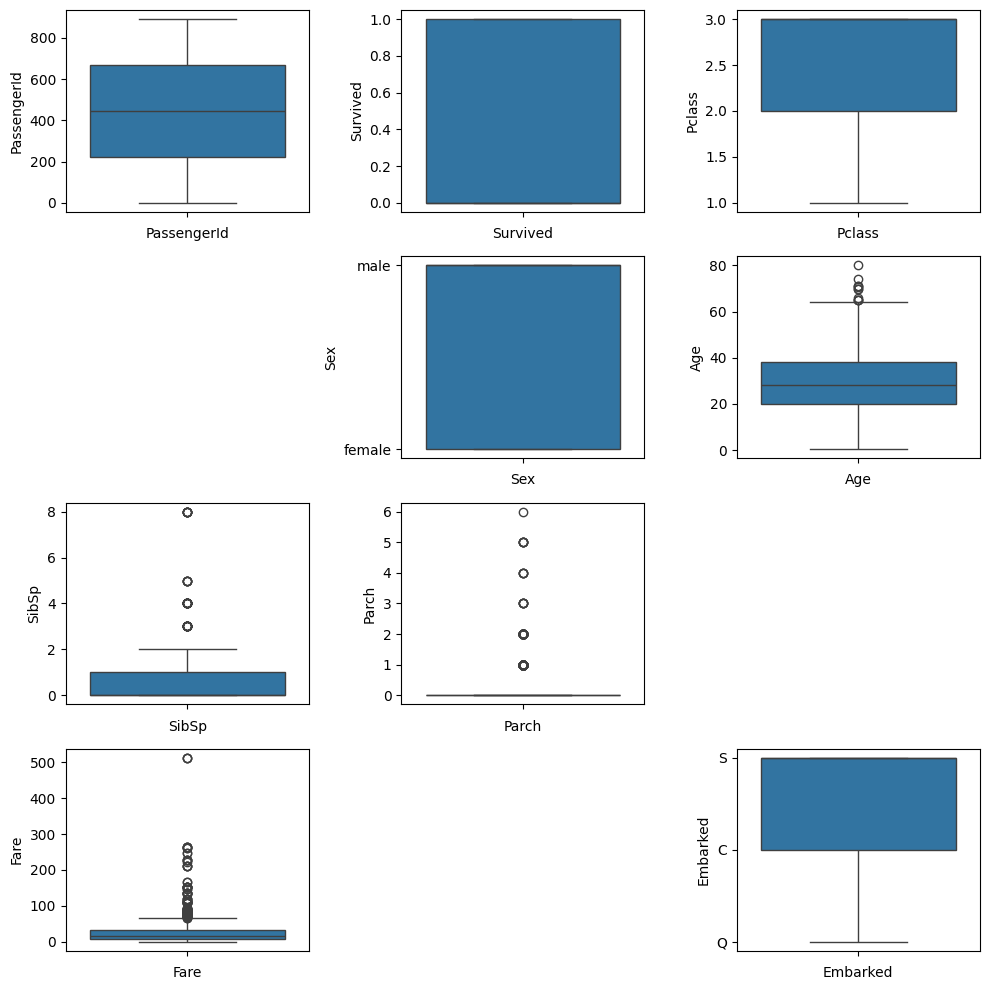

In [73]:
# Boxplot

plt.figure(figsize=(10,10))

for i,col in enumerate(features):
    if col not in {'Ticket','Name','Cabin'}:
        plt.subplot(4,3,i+1)
        sns.boxplot(train_df[col])
        plt.xlabel(col)
plt.tight_layout()
plt.show()


4.	Visualize relationships between features and survival using scatter plots and bar plots.

In [74]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

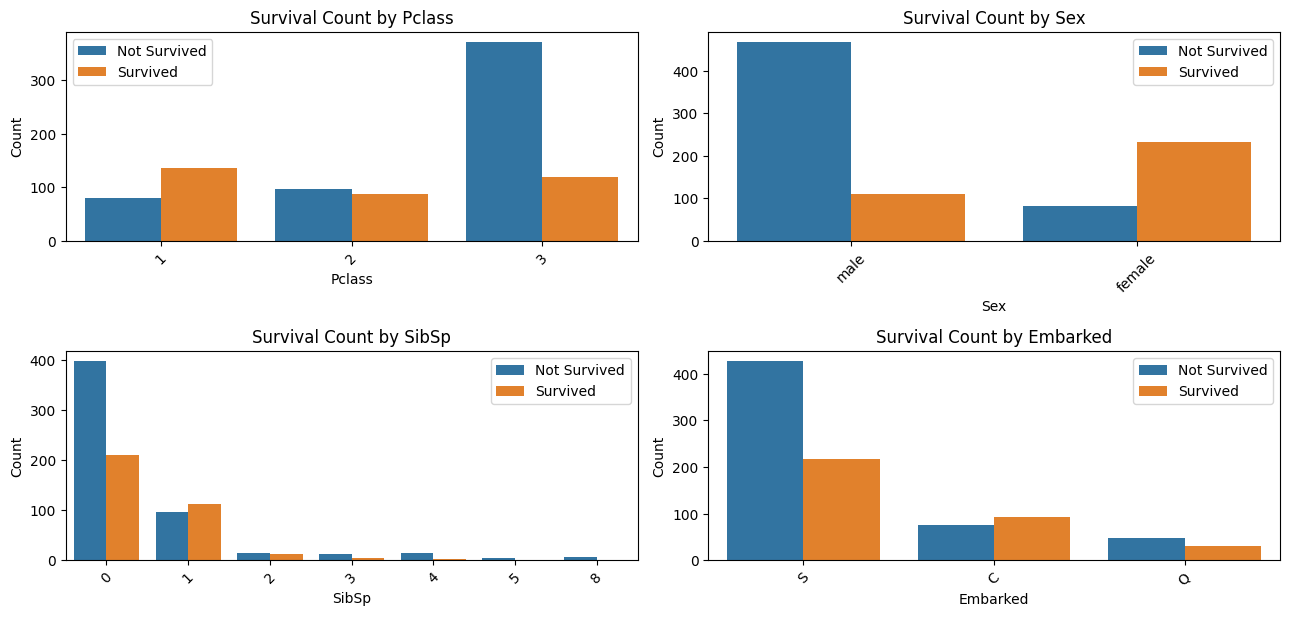

In [75]:
plt.figure(figsize=(13,9))
for i,col in enumerate(['Pclass','Sex','SibSp','Embarked']):
    if col not in {'Survived','Ticket','Name','Cabin'}:

        plt.subplot(3,2,i+1)
        sns.countplot(x=col, hue="Survived", data=train_df)
        plt.title(f"Survival Count by {col}")
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.ylabel("Count")
        plt.legend(["Not Survived", "Survived"])

plt.tight_layout()
plt.show()


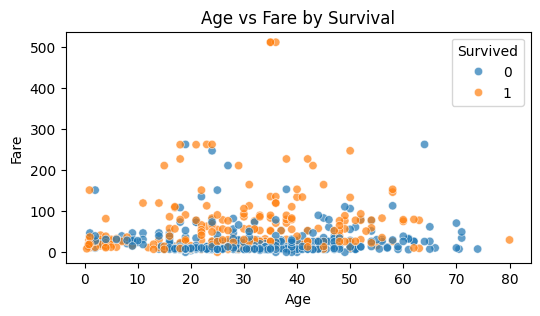

In [76]:

plt.figure(figsize=(6,3))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=train_df, alpha=0.7)
plt.title("Age vs Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

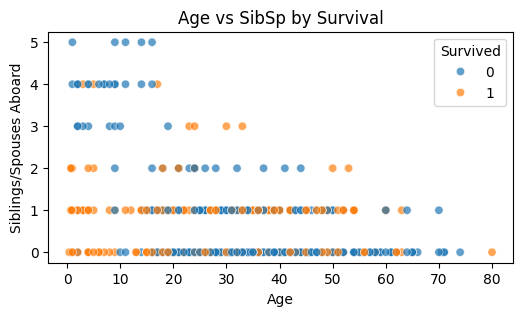

In [77]:
# Age vs SibSp (Siblings/Spouses aboard)
plt.figure(figsize=(6,3))
sns.scatterplot(x="Age", y="SibSp", hue="Survived", data=train_df, alpha=0.7)
plt.title("Age vs SibSp by Survival")
plt.xlabel("Age")
plt.ylabel("Siblings/Spouses Aboard")
plt.show()

### Data Preprocessing:
1.	Impute missing values.

In [78]:
train_df.shape

(891, 12)

In [79]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


2.	Encode categorical variables using one-hot encoding or label encoding. 

In [81]:
from sklearn.preprocessing import LabelEncoder

df_encoded = train_df.copy()

le = LabelEncoder()

df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])
df_encoded['Embarked'] = le.fit_transform(df_encoded['Embarked'])
df_encoded['Cabin'] = le.fit_transform(df_encoded['Cabin'])

print(df_encoded[['Sex', 'Embarked', 'Cabin']].head())

   Sex  Embarked  Cabin
0    1         2     47
1    0         0     81
2    0         2     47
3    0         2     55
4    1         2     47


3.	If needed you can apply more preprocessing methods on the given dataset

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

### Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.

In [83]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Survived','Name','Ticket'],axis=1)
Y = df_encoded['Survived']

In [84]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [85]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def evaluate_model(y_true, y_pred):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))


3.	Build predictive models using LightGBM and XGBoost algorithms.

In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier(max_depth =6,n_estimators=500,learning_rate=0.03,gamma=0.5,objective='binary:logistic',booster='gbtree')


In [87]:
import lightgbm as lgb

dtrain = lgb.Dataset(x_train,label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

4.	Train the models on the training set and evaluate their performance on the testing set.

In [88]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
758,759,3,1,0.330972,-0.474545,-0.473674,-0.486337,47,2
154,155,3,1,0.000000,-0.474545,-0.473674,-0.501187,47,2
64,65,1,1,0.000000,-0.474545,-0.473674,-0.090272,47,0
555,556,1,1,2.485693,-0.474545,-0.473674,-0.113846,47,2
91,92,3,1,-0.746389,-0.474545,-0.473674,-0.490280,47,2
...,...,...,...,...,...,...,...,...,...
703,704,3,1,-0.361618,-0.474545,-0.473674,-0.492545,47,1
412,413,1,0,0.254017,0.432793,-0.473674,1.163700,78,1
225,226,3,1,-0.592481,-0.474545,-0.473674,-0.460162,47,2
156,157,3,0,-1.054207,-0.474545,-0.473674,-0.492714,47,1


In [89]:
xgb.fit(x_train,y_train)
clf = lgb.train(params, dtrain, 500)

In [90]:
y_pred_xgb = xgb.predict(x_test)
y_pred_lgbm = clf.predict(x_test)
y_pred_lgbm = [1 if x >= 0.5 else 0 for x in y_pred_lgbm]

In [91]:
evaluate_model(y_test,y_pred_xgb)


Accuracy : 0.7877094972067039
Precision: 0.8245614035087719
Recall   : 0.6266666666666667
F1-score : 0.7121212121212122


In [92]:
evaluate_model(y_test,y_pred_lgbm)

Accuracy : 0.7597765363128491
Precision: 0.9
Recall   : 0.48
F1-score : 0.6260869565217392


5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [93]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid_lgb = {
    'num_leaves': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.03, 0.1],
    'n_estimators': [200, 400, 600]
}

lgb_grid = GridSearchCV(
    estimator=LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42),
    param_grid=param_grid_lgb,
    scoring='accuracy',
    cv=5
)

lgb_grid.fit(x_train, y_train)

print("Best LightGBM Parameters:", lgb_grid.best_params_)
print("Best Cross-Validation Accuracy:", lgb_grid.best_score_)

best_lgb = lgb_grid.best_estimator_
y_pred_lgb_tuned = best_lgb.predict(x_test)

evaluate_model(y_test, y_pred_lgb_tuned)

Best LightGBM Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400, 'num_leaves': 30}
Best Cross-Validation Accuracy: 0.8328178863390132
Accuracy : 0.7877094972067039
Precision: 0.8135593220338984
Recall   : 0.64
F1-score : 0.7164179104477612


In [94]:
from sklearn.model_selection import  RandomizedSearchCV
from xgboost import XGBClassifier

param_dist_xgb = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', booster='gbtree', random_state=42, eval_metric='logloss'),
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42
)

xgb_random.fit(x_train, y_train)

print("Best XGBoost Parameters:", xgb_random.best_params_)
print("Best Cross-Validation Accuracy:", xgb_random.best_score_)

best_xgb = xgb_random.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(x_test)

evaluate_model(y_test, y_pred_xgb_tuned)


Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.03, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best Cross-Validation Accuracy: 0.8329065300896286
Accuracy : 0.7932960893854749
Precision: 0.8392857142857143
Recall   : 0.6266666666666667
F1-score : 0.7175572519083969


### 5.Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



metrics = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lgb_tuned),
        accuracy_score(y_test, y_pred_xgb_tuned)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lgb_tuned),
        precision_score(y_test, y_pred_xgb_tuned)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lgb_tuned),
        recall_score(y_test, y_pred_xgb_tuned)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lgb_tuned),
        f1_score(y_test, y_pred_xgb_tuned)
    ]
}

metrics_df = pd.DataFrame(metrics)
print("🔹 Model Comparison:\n")
print(metrics_df)




🔹 Model Comparison:

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.787709   0.813559  0.640000  0.716418
1   XGBoost  0.793296   0.839286  0.626667  0.717557


2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


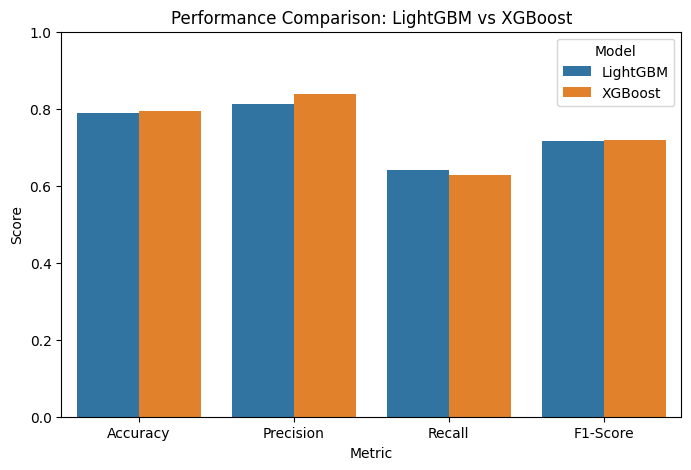

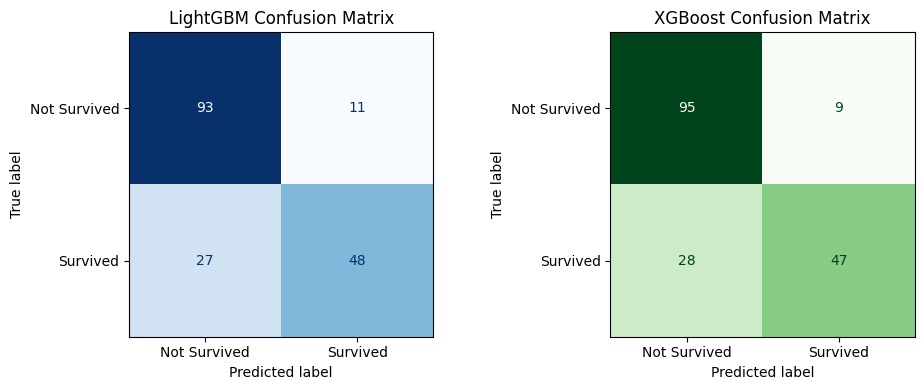

In [96]:
metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(8,5))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted)
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10,4))
cm_lgb = confusion_matrix(y_test, y_pred_lgb_tuned)
cm_xgb = confusion_matrix(y_test, y_pred_xgb_tuned)

ConfusionMatrixDisplay(cm_lgb, display_labels=["Not Survived", "Survived"]).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("LightGBM Confusion Matrix")

ConfusionMatrixDisplay(cm_xgb, display_labels=["Not Survived", "Survived"]).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("XGBoost Confusion Matrix")

plt.tight_layout()
plt.show()



**Comparative Analysis: LightGBM vs XGBoost**

Both models achieve high accuracy, correctly predicting most passengers’ survival.

**Precision & Recall**: XGBoost slightly outperforms LightGBM in identifying actual survivors (higher recall) while maintaining good precision.

**F1-Score**: XGBoost has a marginally better balance between precision and recall, making it slightly more reliable for imbalanced classes.

**Strengths**:

LightGBM → faster training, robust for large datasets.

XGBoost → better at capturing complex patterns, slightly higher F1 and recall.

**Visualization**: Barplots and confusion matrices highlight these differences, showing where each model misclassifies survivors or non-survivors.